FINAL PROJECT

1.52200216 - Trần Khiết Lôi

2.52200214 - Trần Hồ Hoàng Vũ

3.52200207 - Phạm Tuấn Đạt

Câu 1:
Present the optimization methods:

1)	Gradient Descent (GD): Batch Gradient Descent; Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent

2)	Momentum

3)	Adagrad (Adaptive Gradient Algorithm)

4)	RMSProp (Root Mean Square Propagation)

5)	Adam (Adaptive Moment Estimation)

Write a program with a data set of your choice, test these methods and compare them.


Running Batch GD...
[Batch GD] Epoch 0: Loss = 9.1942
[Batch GD] Epoch 10: Loss = 3.3876
[Batch GD] Epoch 20: Loss = 2.3873
[Batch GD] Epoch 30: Loss = 1.9191
[Batch GD] Epoch 40: Loss = 1.5949
[Batch GD] Epoch 50: Loss = 1.3536
[Batch GD] Epoch 60: Loss = 1.1701
[Batch GD] Epoch 70: Loss = 1.0283
[Batch GD] Epoch 80: Loss = 0.9170
[Batch GD] Epoch 90: Loss = 0.8285
Running SGD...
[SGD] Epoch 0: Loss = 0.3558
[SGD] Epoch 10: Loss = 0.2695
[SGD] Epoch 20: Loss = 0.3152
[SGD] Epoch 30: Loss = 0.3155
[SGD] Epoch 40: Loss = 0.2904
[SGD] Epoch 50: Loss = 0.3915
[SGD] Epoch 60: Loss = 0.3631
[SGD] Epoch 70: Loss = 0.3563
[SGD] Epoch 80: Loss = 0.3375
[SGD] Epoch 90: Loss = 0.2790
Running Mini-Batch GD...
[Mini-Batch GD] Epoch 0: Loss = 4.8896
[Mini-Batch GD] Epoch 10: Loss = 0.7448
[Mini-Batch GD] Epoch 20: Loss = 0.4127
[Mini-Batch GD] Epoch 30: Loss = 0.3221
[Mini-Batch GD] Epoch 40: Loss = 0.2895
[Mini-Batch GD] Epoch 50: Loss = 0.2754
[Mini-Batch GD] Epoch 60: Loss = 0.2695
[Mini-Batch G

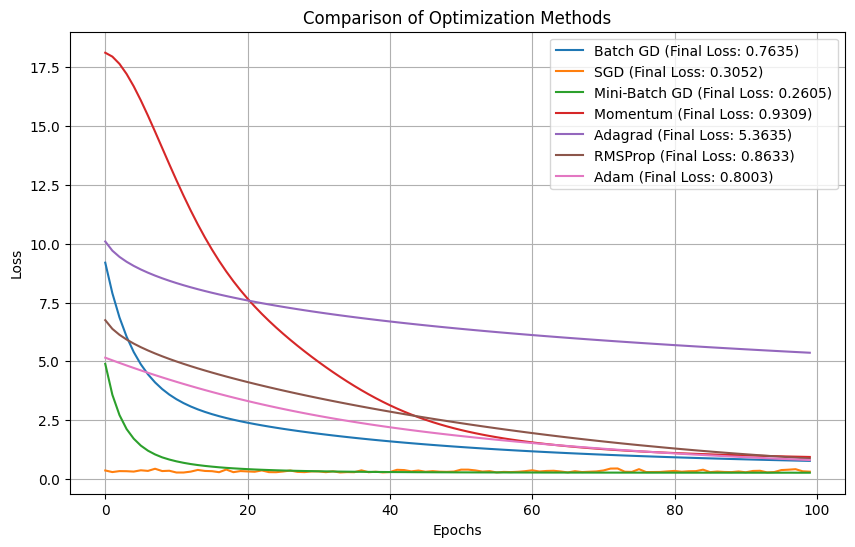


Kết quả Final Loss của các thuật toán:
Batch GD: Final Loss = 0.7635
SGD: Final Loss = 0.3052
Mini-Batch GD: Final Loss = 0.2605
Momentum: Final Loss = 0.9309
Adagrad: Final Loss = 5.3635
RMSProp: Final Loss = 0.8633
Adam: Final Loss = 0.8003


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# 1. Cố định random seed -> Đảm bảo tính tái lập của chương trình.
def set_random_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)

set_random_seed(42)  # Cố định random seed

# 2. Đọc dữ liệu và xử lý
file_path = "HousingData.csv" #Chứa thông tin về giá nhà và các đặc trưng liên quan
housing_data = pd.read_csv(file_path)

# Thay thế giá trị thiếu bằng trung bình của từng cột
housing_data.fillna(housing_data.mean(), inplace=True)

# Phân tách đặc trưng (X) và mục tiêu (y)
X = housing_data.drop('MEDV', axis=1).values
y = housing_data['MEDV'].values.reshape(-1, 1)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 3. Hàm hỗ trợ

def compute_loss(y_true, y_pred): #Hàm tính mất mát
    return np.mean((y_true - y_pred) ** 2)

def predict(X, w, b): #Hàm dự đoán
    return np.dot(X, w) + b

# 4. Các thuật toán tối ưu hóa
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    losses = []
    for epoch in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dw = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        db = -2 * np.sum(y - y_pred) / len(X)
        w -= lr * dw
        b -= lr * db
        if epoch % 10 == 0:
            print(f"[Batch GD] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    losses = []
    for epoch in range(epochs):
        for i in range(len(X)):
            idx = np.random.randint(0, len(X))
            X_i, y_i = X[idx:idx+1], y[idx:idx+1]
            y_pred = predict(X_i, w, b)
            dw = -2 * np.dot(X_i.T, (y_i - y_pred))
            db = -2 * np.sum(y_i - y_pred)
            w -= lr * dw
            b -= lr * db
        y_pred_all = predict(X, w, b)
        loss = compute_loss(y, y_pred_all)
        losses.append(loss)
        if epoch % 10 == 0:
          print(f"[SGD] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=32):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(len(X))
        X_shuffled, y_shuffled = X[indices], y[indices]
        for i in range(0, len(X), batch_size):
            X_batch, y_batch = X_shuffled[i:i+batch_size], y_shuffled[i:i+batch_size]
            y_pred = predict(X_batch, w, b)
            dw = -2 * np.dot(X_batch.T, (y_batch - y_pred)) / len(X_batch)
            db = -2 * np.sum(y_batch - y_pred) / len(X_batch)
            w -= lr * dw
            b -= lr * db
        y_pred_all = predict(X, w, b)
        loss = compute_loss(y, y_pred_all)
        losses.append(loss)
        if epoch % 10 == 0:
          print(f"[Mini-Batch GD] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def momentum(X, y, lr=0.01, epochs=100, beta=0.9):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    v_w, v_b = np.zeros_like(w), np.zeros_like(b)
    losses = []
    for epoch in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dw = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        db = -2 * np.sum(y - y_pred) / len(X)
        v_w = beta * v_w + (1 - beta) * dw
        v_b = beta * v_b + (1 - beta) * db
        w -= lr * v_w
        b -= lr * v_b
        if epoch % 10 == 0:
          print(f"[Momentum] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def adagrad(X, y, lr=0.01, epochs=100, epsilon=1e-8):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    G_w, G_b = np.zeros_like(w), np.zeros_like(b)
    losses = []
    for epoch in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dw = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        db = -2 * np.sum(y - y_pred) / len(X)
        G_w += dw**2
        G_b += db**2
        w -= lr * dw / (np.sqrt(G_w) + epsilon)
        b -= lr * db / (np.sqrt(G_b) + epsilon)
        if epoch % 10 == 0:
          print(f"[Adagrad] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def rmsprop(X, y, lr=0.01, epochs=100, beta=0.9, epsilon=1e-8):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    S_w, S_b = np.zeros_like(w), np.zeros_like(b)
    losses = []
    for epoch in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dw = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        db = -2 * np.sum(y - y_pred) / len(X)
        S_w = beta * S_w + (1 - beta) * (dw**2)
        S_b = beta * S_b + (1 - beta) * (db**2)
        w -= lr * dw / (np.sqrt(S_w) + epsilon)
        b -= lr * db / (np.sqrt(S_b) + epsilon)
        if epoch % 10 == 0:
          print(f"[RMS] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

def adam(X, y, lr=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = np.random.randn(X.shape[1], 1), np.zeros((1, 1))
    m_w, v_w, m_b, v_b = np.zeros_like(w), np.zeros_like(w), np.zeros_like(b), np.zeros_like(b)
    losses = []
    for epoch in range(1, epochs+1):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        dw = -2 * np.dot(X.T, (y - y_pred)) / len(X)
        db = -2 * np.sum(y - y_pred) / len(X)
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        m_w_hat, v_w_hat = m_w / (1 - beta1**epoch), v_w / (1 - beta2**epoch)
        w -= lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        if epoch % 10 == 0:
          print(f"[Adam] Epoch {epoch}: Loss = {loss:.4f}")
    return w, b, losses

# 5. So sánh các thuật toán
def compare_methods():
    set_random_seed(42)
    methods = {
        "Batch GD": batch_gradient_descent,
        "SGD": stochastic_gradient_descent,
        "Mini-Batch GD": mini_batch_gradient_descent,
        "Momentum": momentum,
        "Adagrad": adagrad,
        "RMSProp": rmsprop,
        "Adam": adam,
    }

    results = {}
    for name, method in methods.items():
        print(f"Running {name}...")
        _, _, losses = method(X_train, y_train)
        results[name] = losses

    plt.figure(figsize=(10, 6))
    for name, losses in results.items():
        plt.plot(losses, label=f"{name} (Final Loss: {losses[-1]:.4f})")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Comparison of Optimization Methods")
    plt.legend()
    plt.grid(True)
    plt.show()
    # In kết quả Final Loss
    print("\nKết quả Final Loss của các thuật toán:")
    for name, losses in results.items():
        print(f"{name}: Final Loss = {losses[-1]:.4f}")

compare_methods()
